In [1]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2 as cv

In [48]:
w = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])
f = np.array([
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,1,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0]
])
x = np.arange(0,3,1)
y = np.arange(0,3,1)
x_new, y_new = np.meshgrid(x,y)


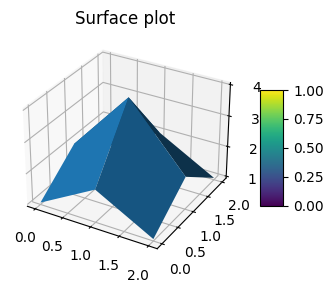

In [49]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize =(5,3))
ax = plt.axes(projection ='3d')
my_cmap = plt.get_cmap('hot')

surf = ax.plot_surface(x_new, y_new, w)

fig.colorbar(surf, ax = ax, shrink = 0.5, aspect = 5)

ax.set_title('Surface plot')

plt.show()
 

In [4]:
def imgconv(img = f, kernel = w):
    return ndimage.convolve(f,w, mode='constant', cval=0.0)  

print(imgconv(f,w))  

[[0 1 2 1 0]
 [0 3 6 3 0]
 [0 4 8 4 0]
 [0 3 6 3 0]
 [0 1 2 1 0]]


In [5]:
img1 = cv.imread("house-downsampled.png")

In [6]:
avgfilter_3 =(1/9)*np.ones((3,3))
avgfilter_5 =(1/25)*np.ones((5,5)) 
avgfilter_11=(1/121)*np.ones((11,11))

conv_1 = cv.filter2D(img1,-1, avgfilter_3)
conv_2 = cv.filter2D(img1,-1, avgfilter_5)
conv_3 = cv.filter2D(img1,-1, avgfilter_11)


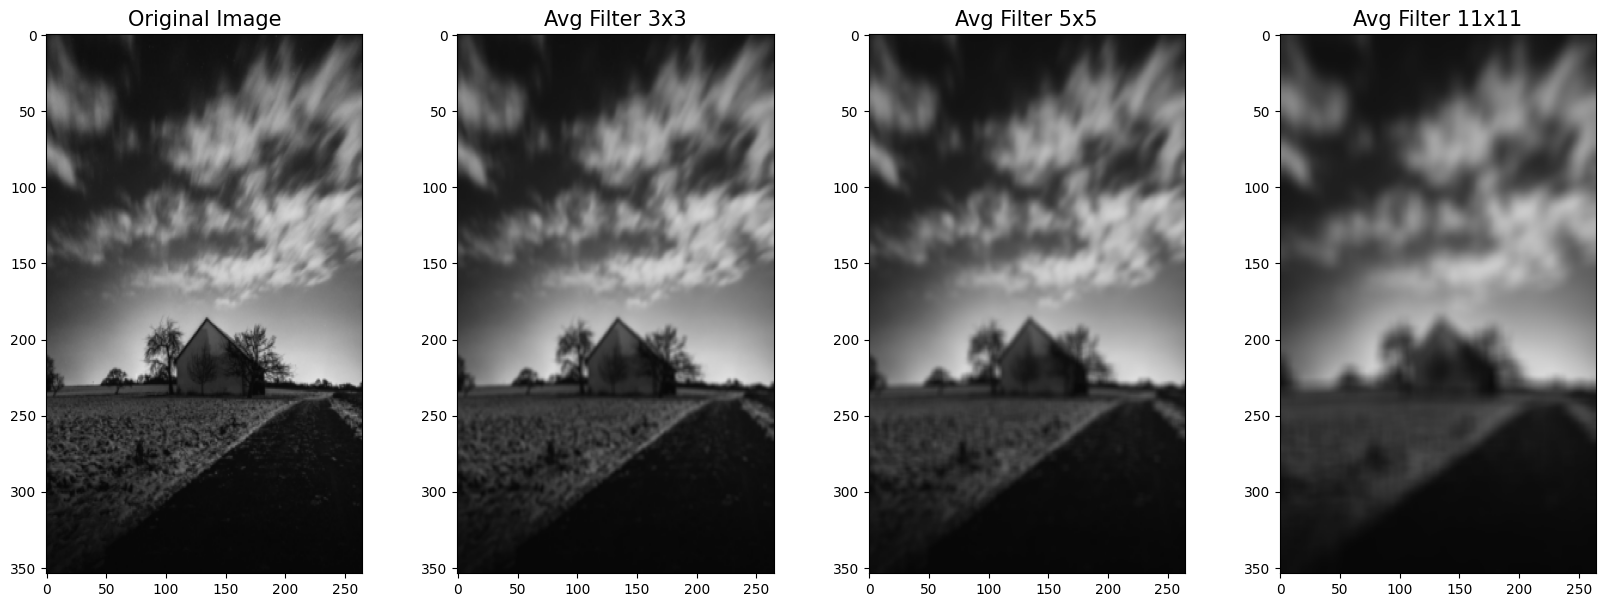

In [7]:
f, axarr = plt.subplots(1,4,figsize=(20,7),gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

axarr[0].imshow(img1, aspect='auto')
axarr[0].set_title('Original Image',fontsize=15)
axarr[1].imshow(conv_1, aspect='auto')
axarr[1].set_title('Avg Filter 3x3',fontsize=15)
axarr[2].imshow(conv_2, aspect='auto')
axarr[2].set_title('Avg Filter 5x5',fontsize=15)
axarr[3].imshow(conv_3, aspect='auto')
axarr[3].set_title('Avg Filter 11x11',fontsize=15)

plt.show()

In [8]:
def gaussian_kernel(m):
    sigma = 1
    y=np.arange(-(m-1)/2,(m-1)/2+1,1)
    x=np.arange(-(m-1)/2,(m-1)/2+1,1)
    h1, h2 = np.meshgrid(x,y)
    hg = np.exp(- (h1**2+h2**2) / (2*sigma**2))
    h = hg /np.sum(hg)
    return h        

In [9]:
gaussian_3 = gaussian_kernel(3)
gaussian_5 = gaussian_kernel(5)
gaussian_11 = gaussian_kernel(11)

gconv1 = cv.filter2D(img1, -1, gaussian_3)
gconv2 = cv.filter2D(img1, -1, gaussian_5)
gconv3 = cv.filter2D(img1, -1, gaussian_11)


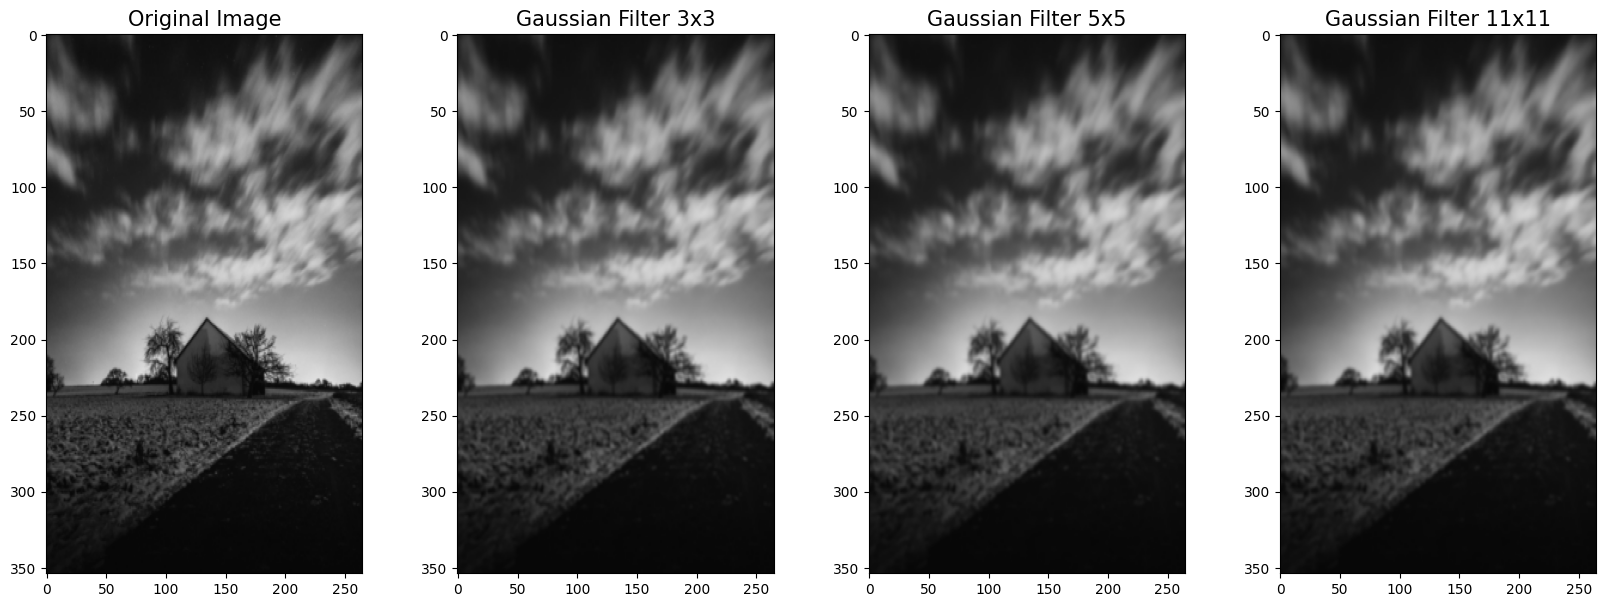

In [10]:
f, axarr = plt.subplots(1,4,figsize=(20,7),gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

axarr[0].imshow(img1, aspect='auto')
axarr[0].set_title('Original Image',fontsize=15)
axarr[1].imshow(gconv1, aspect='auto')
axarr[1].set_title('Gaussian Filter 3x3',fontsize=15)
axarr[2].imshow(gconv2, aspect='auto')
axarr[2].set_title('Gaussian Filter 5x5',fontsize=15)
axarr[3].imshow(gconv3, aspect='auto')
axarr[3].set_title('Gaussian Filter 11x11',fontsize=15)

plt.show()



In [11]:
x1 = np.arange(0,5,1)
y1 = np.arange(0,5,1)
x1_new, y1_new = np.meshgrid(x1,y1)

x2 = np.arange(0,11,1)
y2 = np.arange(0,11,1)
x2_new, y2_new = np.meshgrid(x2,y2)

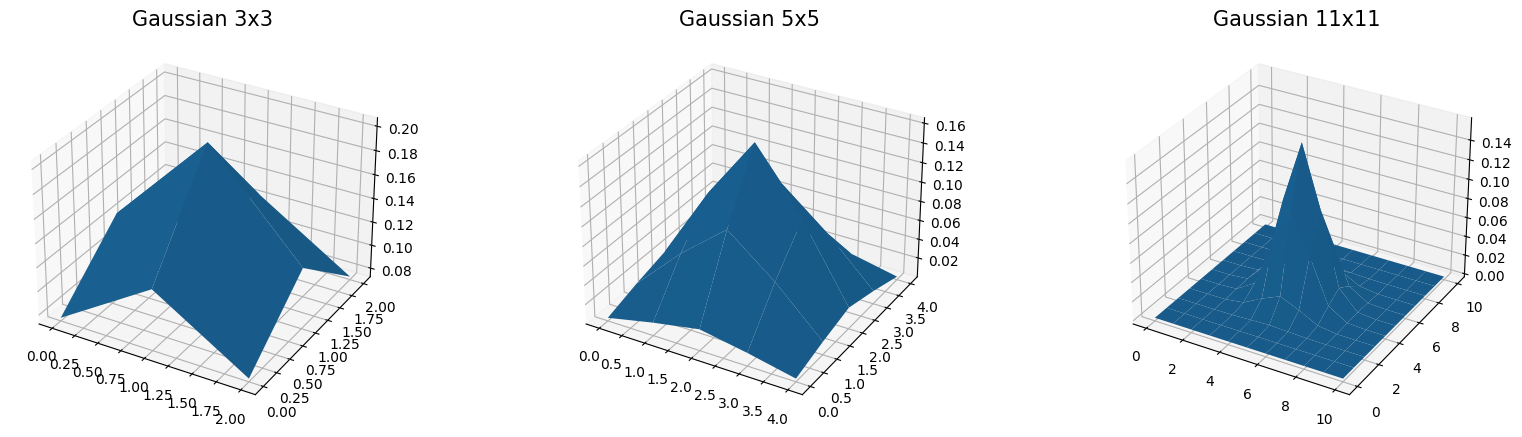

In [12]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(x_new, y_new,gaussian_3)
ax.set_title('Gaussian 3x3',fontsize=15)
 
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(x1_new, y1_new,gaussian_5)
ax.set_title('Gaussian 5x5',fontsize=15)

ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(x2_new, y2_new,gaussian_11)
ax.set_title('Gaussian 11x11',fontsize=15)

 
plt.show()

In [39]:
#Creating Sobel filter
kernely = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
    ])
kernelx = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
    ])

x = cv.filter2D(img1, -1, kernelx)
y = cv.filter2D(img1, -1, kernely)


h = np.abs(x)+np.abs(y)

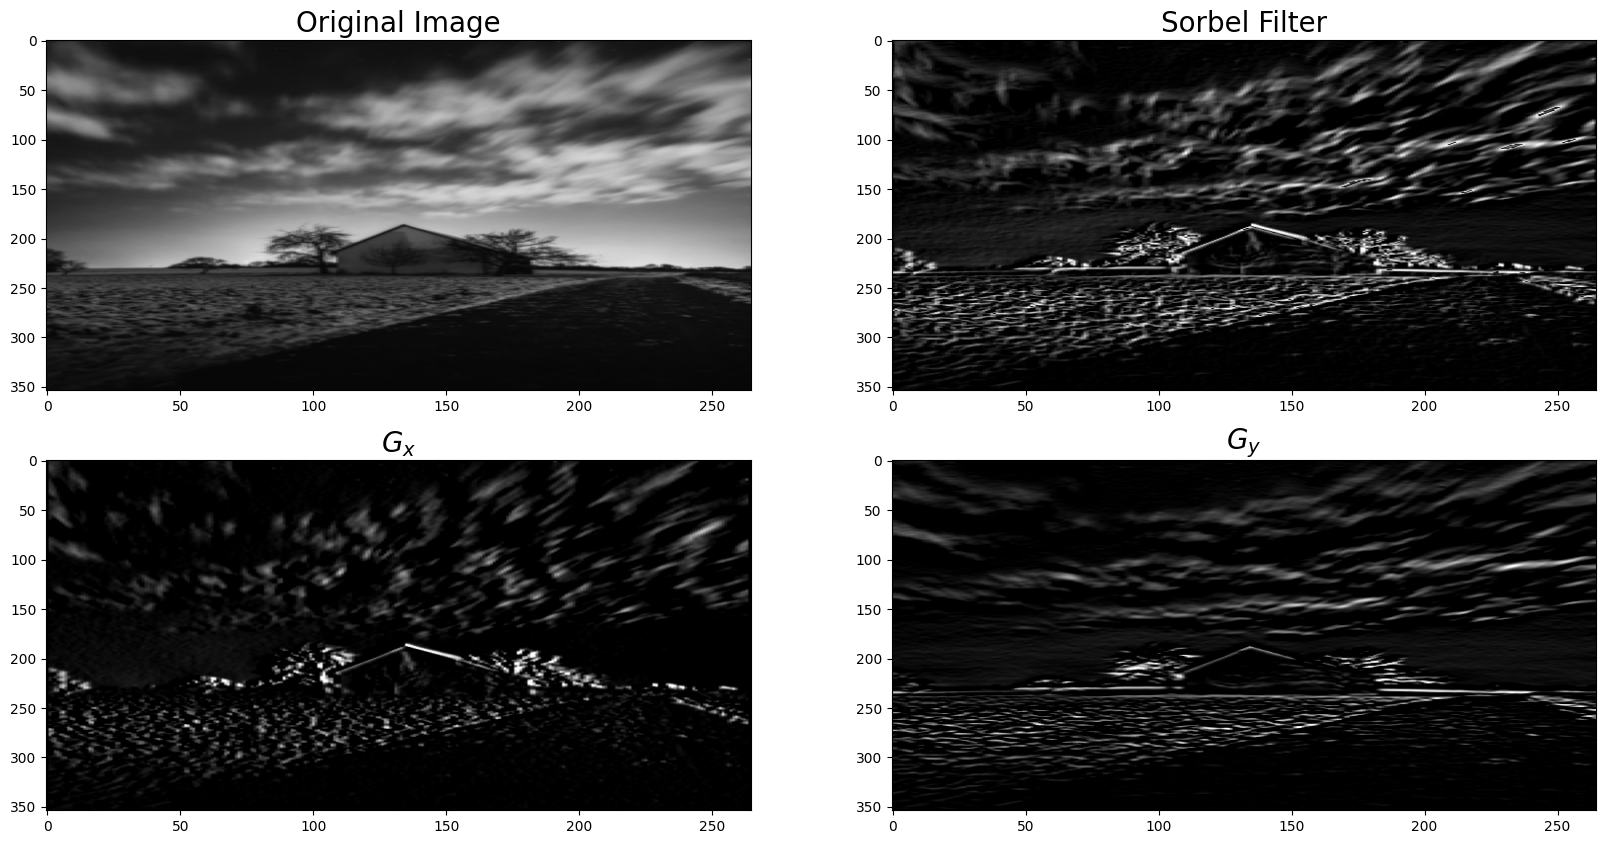

In [44]:
fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(221)
ax.imshow(img1, aspect='auto')
ax.set_title('Original Image', fontsize=20)

ax = fig.add_subplot(222)
ax.imshow(h, aspect='auto')
ax.set_title('Sorbel Filter', fontsize=20)

ax = fig.add_subplot(223)
ax.imshow(x, aspect='auto')
ax.set_title('$G_x$', fontsize=20)

ax = fig.add_subplot(224)
ax.imshow(y, aspect='auto')
ax.set_title('$G_y$', fontsize=20)
plt.show()

In [41]:
#Orientation of Image
Gradient_Dir1 = np.arctan(y/x)
print(Gradient_Dir1)


[[[       nan        nan        nan]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]]

 [[1.57079633 1.57079633 1.57079633]
  [0.46364761 0.46364761 0.46364761]
  [0.5485494  0.5485494  0.5485494 ]
  ...
  [1.57079633 1.57079633 1.57079633]
  [1.57079633 1.57079633 1.57079633]
  [1.57079633 1.57079633 1.57079633]]

 [[1.57079633 1.57079633 1.57079633]
  [0.4533387  0.4533387  0.4533387 ]
  [0.49394137 0.49394137 0.49394137]
  ...
  [1.57079633 1.57079633 1.57079633]
  [1.57079633 1.57079633 1.57079633]
  [1.57079633 1.57079633 1.57079633]]

 ...

 [[       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]
  ...
  [       nan        nan        nan]
  [1.57079633 1.57079633 1.57079633]
  [1.57079633 1.57079633 1.57079633]]

 [[       nan        nan        nan]
  [0.         0.         0.        ]


C:\Users\aayus\AppData\Local\Temp\ipykernel_8196\346906336.py:2: RuntimeWarning: divide by zero encountered in divide
  Gradient_Dir1 = np.arctan(y/x)
C:\Users\aayus\AppData\Local\Temp\ipykernel_8196\346906336.py:2: RuntimeWarning: invalid value encountered in divide
  Gradient_Dir1 = np.arctan(y/x)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


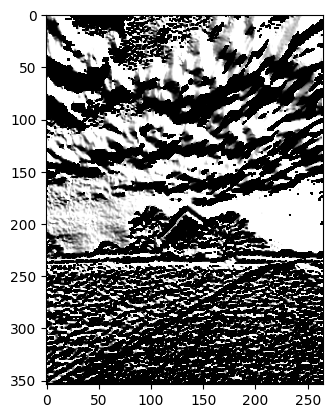

In [45]:
plt.imshow(Gradient_Dir1)
plt.show()

In [17]:
rcg_x = np.array([
    [-1,0],
    [0,1]
])

rcg_y = np.array([
    [0,-1],
    [1,0]
])

x = cv.filter2D(img1, -1, rcg_x)
y = cv.filter2D(img1, -1, rcg_y)
h2 = np.abs(x)+np.abs(y)


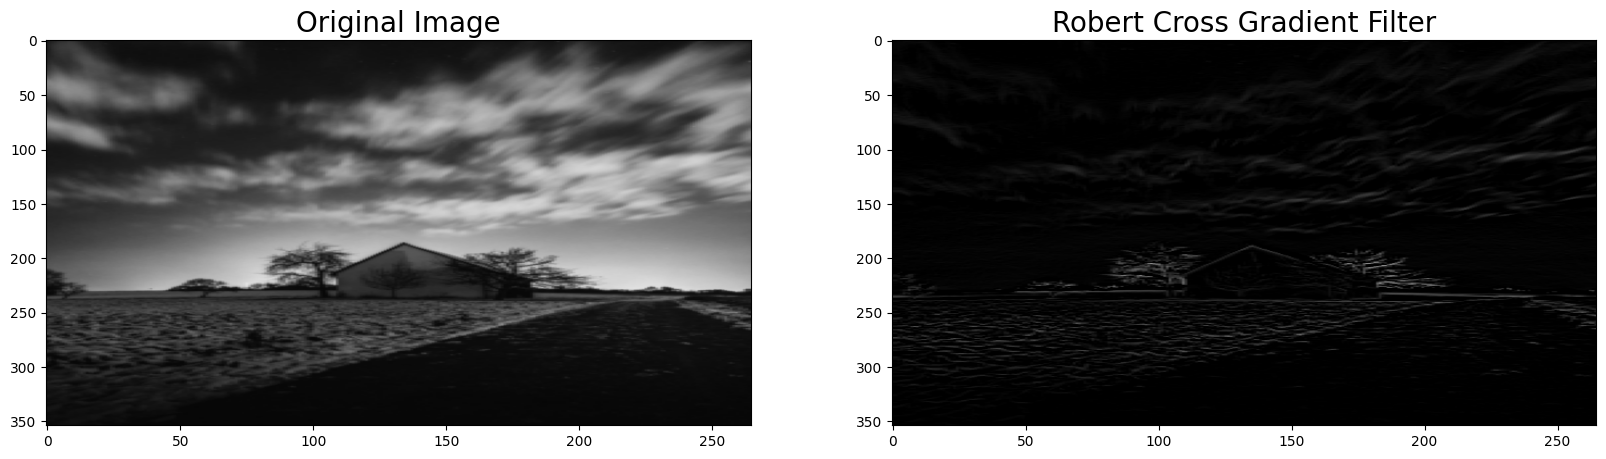

In [18]:
fig = plt.figure(figsize = (20,5))

ax = fig.add_subplot(121)
ax.imshow(img1, aspect='auto')
ax.set_title('Original Image', fontsize=20)

ax = fig.add_subplot(122)
ax.imshow(h2, aspect='auto')
ax.set_title('Robert Cross Gradient Filter', fontsize=20)
plt.show()

In [19]:
Laplacian = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])
Lap_img = cv.filter2D(img1, -1, Laplacian)
Sharpened_img = img1 + 3*Lap_img

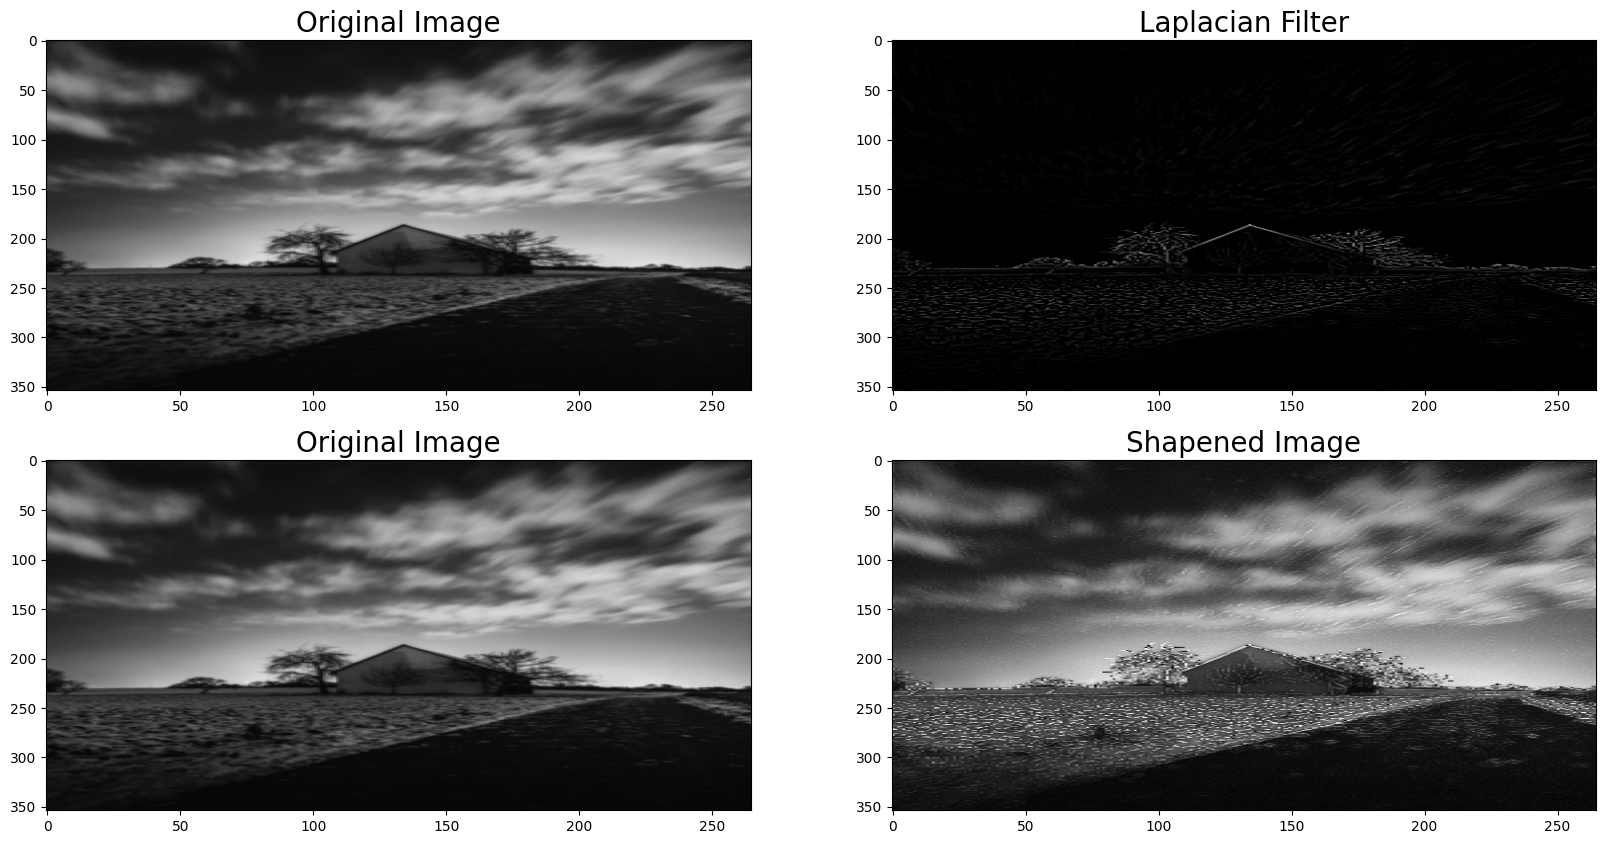

In [20]:
fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(221)
ax.imshow(img1, aspect='auto')
ax.set_title('Original Image', fontsize=20)

ax = fig.add_subplot(222)
ax.imshow(Lap_img, aspect='auto')
ax.set_title('Laplacian Filter', fontsize=20)

ax = fig.add_subplot(223)
ax.imshow(img1, aspect='auto')
ax.set_title('Original Image', fontsize=20)

ax = fig.add_subplot(224)
ax.imshow(Sharpened_img, aspect='auto')
ax.set_title('Sharpened Image', fontsize=20)

plt.show()

In [21]:
img3 = cv.imread('tiger_noise.png')

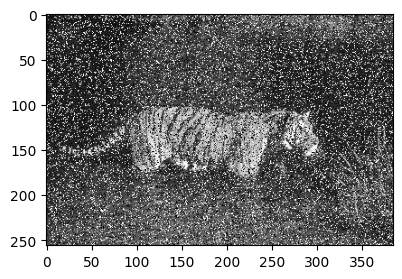

In [22]:
plt.figure(figsize=(5,3))
plt.imshow(img3)
plt.show()

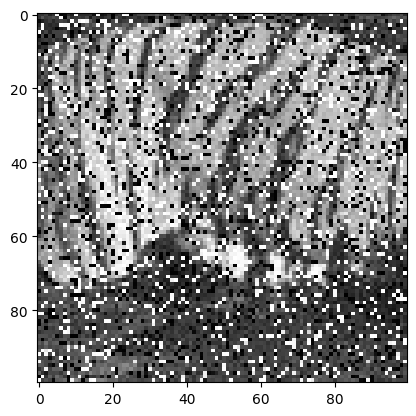

In [23]:
plt.imshow(img3[100:200,100:200])

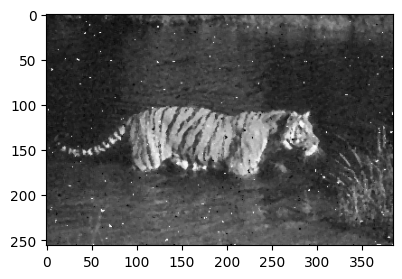

In [24]:
denoise_img3 = cv.medianBlur(img3,3)
plt.figure(figsize=(5,3))
plt.imshow(denoise_img3)
plt.show()

In [25]:
#Creating Sobel filter
kernely = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
    ])
kernelx = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
    ])

x = cv.filter2D(denoise_img3, -1, kernelx)
y = cv.filter2D(denoise_img3, -1, kernely)


h = np.abs(x)+np.abs(y)

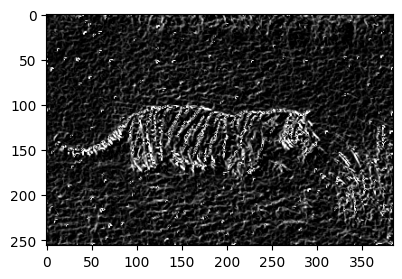

In [26]:
plt.figure(figsize=(5,3))
plt.imshow(h)
plt.show()

In [27]:
Laplacian = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])
Lap_img3 = cv.filter2D(denoise_img3, -1, Laplacian)
Sharpened_img3 = denoise_img3 + 3*Lap_img3

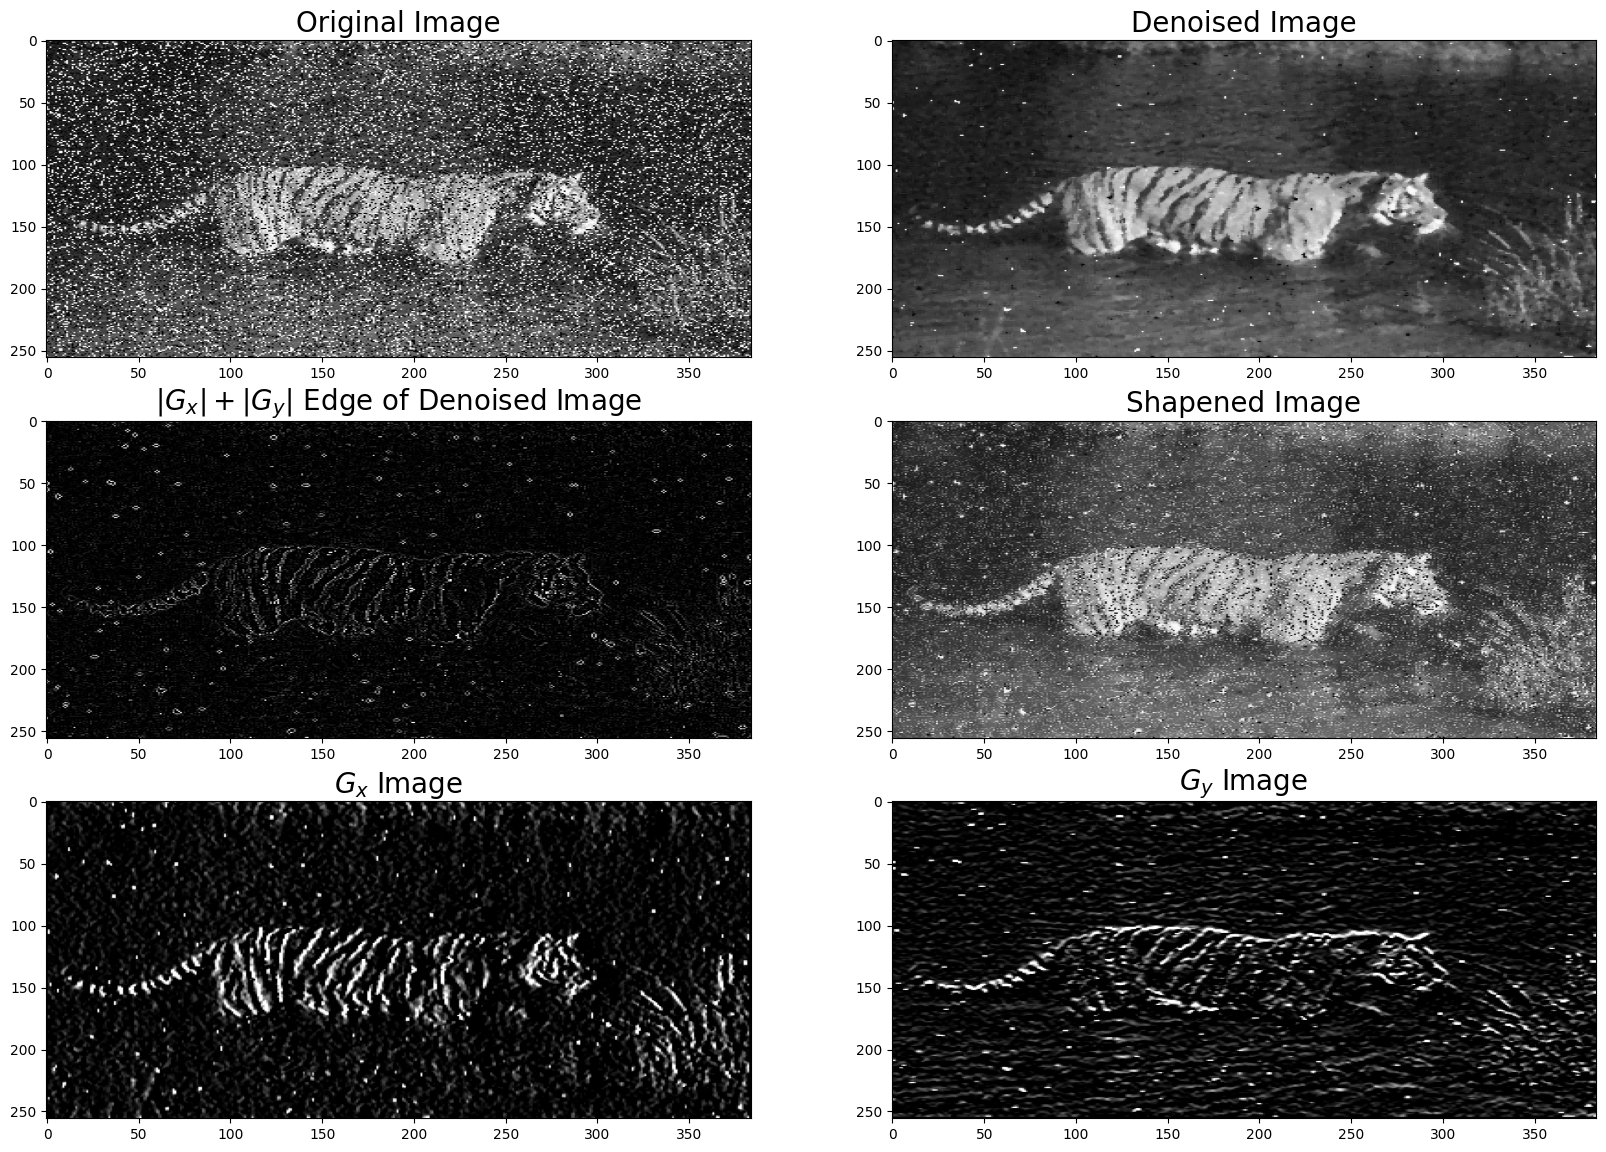

In [36]:
fig = plt.figure(figsize = (20,14))

ax = fig.add_subplot(321)
ax.imshow(img3, aspect='auto')
ax.set_title('Original Image', fontsize=20)

ax = fig.add_subplot(322)
ax.imshow(denoise_img3, aspect='auto')
ax.set_title('Denoised Image', fontsize=20)

ax = fig.add_subplot(323)
ax.imshow(Lap_img3, aspect='auto')
ax.set_title('$|G_x|+|G_y|$ Edge of Denoised Image', fontsize=20)

ax = fig.add_subplot(324)
ax.imshow(Sharpened_img3, aspect='auto')
ax.set_title('Sharpened Image', fontsize=20)

ax = fig.add_subplot(325)
ax.imshow(x, aspect='auto')
ax.set_title('$G_x$ Image', fontsize=20)

ax = fig.add_subplot(326)
ax.imshow(y, aspect='auto')
ax.set_title('$G_y$ Image', fontsize=20)


plt.show()

In [29]:
#Orientation of Image
Gradient_Dir2 = np.arctan(y/x)

C:\Users\aayus\AppData\Local\Temp\ipykernel_8196\2314782855.py:2: RuntimeWarning: divide by zero encountered in divide
  Gradient_Dir2 = np.arctan(y/x)
C:\Users\aayus\AppData\Local\Temp\ipykernel_8196\2314782855.py:2: RuntimeWarning: invalid value encountered in divide
  Gradient_Dir2 = np.arctan(y/x)


In [32]:
print(Gradient_Dir2)

[[[       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [       nan        nan        nan]]

 [[       nan        nan        nan]
  [       nan        nan        nan]
  [1.57079633 1.57079633 1.57079633]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [       nan        nan        nan]]

 [[       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]
  ...
  [       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]]

 ...

 [[1.57079633 1.57079633 1.57079633]
  [1.57079633 1.57079633 1.57079633]
  [1.57079633 1.57079633 1.57079633]
  ...
  [1.04735312 1.04735312 1.04735312]
  [1.57079633 1.57079633 1.57079633]
  [1.57079633 1.57079633 1.57079633]]

 [[1.57079633 1.57079633 1.57079633]
  [1.57079633 1.57079633 1.57079633]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


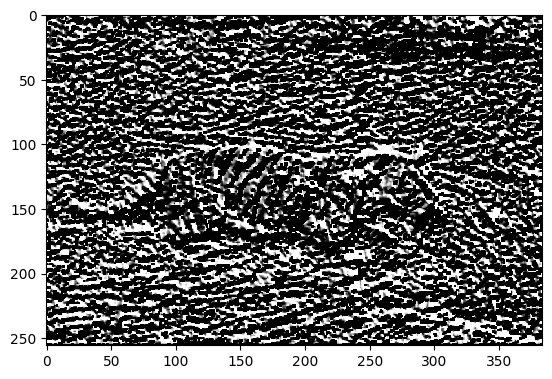

In [33]:
plt.imshow(Gradient_Dir2)